In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import glob

from sklearn.metrics import confusion_matrix
import itertools

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPool1D
from keras.initializers import random_uniform
# from keras.layers.advanced_activations import LeakyReLU
from keras.layers import LeakyReLU
from keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler as SS

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from matplotlib import pyplot as plt
# from keras.preprocessing.sequence import pad_sequences
from keras.utils import pad_sequences
from keras.layers import Embedding,Dense,LSTM,Dropout,Flatten,BatchNormalization,Conv1D,GlobalMaxPooling1D,MaxPooling1D
from keras.optimizers import  SGD
import matplotlib.pyplot as plt
from keras.regularizers import l2
from keras.optimizers import Adam
from keras import regularizers
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import OneHotEncoder
from keras.preprocessing import sequence
from keras.layers import SimpleRNN
#from hyperas.distributions import uniform
from tensorflow.keras.utils import to_categorical
#from tensorflow.keras.utils.np_utils import to_categorical
from keras import regularizers
import pandas as pd
import string
import numpy as np
import matplotlib.pyplot as plt

# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv('\Hybrid Metaheuristic Feature Selection\Dataset\IoT ID 20_MHFS.csv',low_memory=False)  # my path

In [ ]:
dataset.head()

,stime,daddr,AR_P_Proto_P_SrcIP,proto,TnP_Per_Dport,stddev,attack
0,1528081327,18,0.149551,3,400,0.000000,1
1,1528095765,16,0.382600,3,500,1.572389,1
2,1528081356,20,0.200865,3,752,0.055722,1
3,1528099368,16,0.560736,4,800,1.006915,1
4,1528084923,20,0.272007,4,830,1.561709,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107783 entries, 0 to 107782
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   stime               107783 non-null  int64  
 1   daddr               107783 non-null  int64  
 2   AR_P_Proto_P_SrcIP  107783 non-null  float64
 3   proto               107783 non-null  int64  
 4   TnP_Per_Dport       107783 non-null  int64  
 5   stddev              107783 non-null  float64
 6   attack              107783 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 5.8 MB


In [ ]:
# Splitting dataset into features and labels.
labels = dataset['Label']
features = dataset.loc[:, dataset.columns != 'Label']

In [ ]:
features

,stime,daddr,AR_P_Proto_P_SrcIP,proto,TnP_Per_Dport,stddev
0,1528081327,18,0.149551,3,400,0.000000
1,1528095765,16,0.382600,3,500,1.572389
2,1528081356,20,0.200865,3,752,0.055722
3,1528099368,16,0.560736,4,800,1.006915
4,1528084923,20,0.272007,4,830,1.561709
...,...,...,...,...,...,...
107778,1526345484,69,3.379680,4,28,0.000000
107779,1526347892,18,27.072100,4,221903,0.093033
107780,1526350039,17,0.006878,3,10,0.000005
107781,1526345683,69,20.826200,4,28,0.000000


In [ ]:
# For scaling the data, we use RobustScaler class from sklearn.

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [ ]:
scaler = RobustScaler()
scaler.fit(features)

features = scaler.transform(features)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
LE = LabelEncoder()

LE.fit(labels)
labels = LE.transform(labels)

In [ ]:
#df=pd.concat()

In [ ]:
# Labels have been replaced with integers.

np.unique(labels)

array([0, 1])

In [ ]:
# Checking that encoding reversal works.

d = LE.inverse_transform(labels)
d = pd.Series(d)
d.unique()


array([1, 0])

In [ ]:
#df

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# The next step is to split training and testing data. For this we will use sklearn function train_test_split().

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size= 0.2,random_state=1)

In [ ]:
features_train.shape, labels_train.shape ,features_test.shape , labels_test.shape

((86226, 6), (86226,), (21557, 6), (21557,))

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy = 0.3, k_neighbors = 5, random_state = 100)
xtrain, ytrain = sm.fit_resample(features_train, labels_train.ravel())
#ytrain.value_counts()
xtrain.shape,ytrain.shape


((111606, 6), (111606,))

In [ ]:
#features_train,  features_val, labels_train, labels_val = train_test_split(features_train, labels_train, test_size=0.25, random_state=1)
#features_train.shape, labels_train.shape ,features_val.shape ,labels_val.shape

In [ ]:
import datetime
import os
log_dir = os.path.join("train_logs",datetime.datetime.now().strftime("%Y%m%d-%H%M%S"),)

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# TF callback that stops training when best value of validationi loss function is reached
eary_stop_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

In [ ]:
# this function has evaluation metrics
def report(prediction, y_true):
    print('        ----------Classification Report Of Classes-------------')
    print(classification_report(y_true,prediction))
    print('\n        ----------Validation Data------------------')
    print('Accuarcy:',accuracy_score(y_true, prediction)* 100)
    print('Precision: {:,.4f} %'.format(precision_score(y_true, prediction, average='macro') * 100))
    print('Recall-score: {:,.4f}'.format(recall_score(y_true, prediction, average='weighted') * 100))
    print('F1-score: {:,.4f}'.format(f1_score(y_true, prediction, average='weighted') * 100))

In [ ]:
# plotting loss graphs w.r.t each epoch
def plotgraphs(model):
    f, ax = plt.subplots()
    ax.plot([None] + model.history.history["accuracy"], 'o-')
    ax.plot([None] + model.history.history["val_accuracy"], 'x-')

    ax.legend(['Train_Accuracy', 'Val_Accuracy'], loc = 0)
    ax.set_title('Training/Val Accuracy Per Epoch')
    ax.set_xlabel('epoch')
    ax.set_ylabel('acc')
    plt.show()

    f, ax = plt.subplots()
    ax.plot([None] + model.history.history["loss"], 'o-')
    ax.plot([None] + model.history.history["val_loss"], 'x-')

    ax.legend(['Train_Loss', 'Val_Loss'], loc = 0)
    ax.set_title('Training/Val Losses Per Epoch')
    ax.set_xlabel('epoch')
    ax.set_ylabel('loss')
    plt.show()

### DNN Models

In [ ]:
#create dnn model
dnn1= Sequential()

#layer 1
dnn1.add(Dense(256, activation='relu', input_shape=(features_train.shape[1],)))
dnn1.add(Dropout(0.1))

#output layer
dnn1.add(Dense(34, activation='sigmoid'))

dnn1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               1792      
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 32)               

In [ ]:
dnn1.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics = ['accuracy'])
dnn1.fit(xtrain,ytrain,epochs=100,batch_size=64,validation_data=(features_test,labels_test),callbacks=[tensorboard_callback, eary_stop_callback])

Epoch 1/100
1744/1744 [==============================] - 14s 7ms/step - loss: 0.5941 - accuracy: 0.9785 - val_loss: 0.0704 - val_accuracy: 0.9928
Epoch 2/100
1744/1744 [==============================] - 12s 7ms/step - loss: 0.1341 - accuracy: 0.9962 - val_loss: 0.0235 - val_accuracy: 0.9993
Epoch 3/100
1744/1744 [==============================] - 11s 7ms/step - loss: 0.0791 - accuracy: 0.9973 - val_loss: 0.0263 - val_accuracy: 0.9984
Epoch 4/100
1744/1744 [==============================] - 12s 7ms/step - loss: 0.1226 - accuracy: 0.9960 - val_loss: 0.0091 - val_accuracy: 0.9992
Epoch 5/100
1744/1744 [==============================] - 12s 7ms/step - loss: 0.0514 - accuracy: 0.9958 - val_loss: 8.8752e-04 - val_accuracy: 0.9999
Epoch 6/100
1744/1744 [==============================] - 12s 7ms/step - loss: 0.8551 - accuracy: 0.9933 - val_loss: 0.0024 - val_accuracy: 0.9992
Epoch 7/100
1744/1744 [==============================] - 12s 7ms/step - loss: 0.0152 - accuracy: 0.9940 - val_loss: 0.00

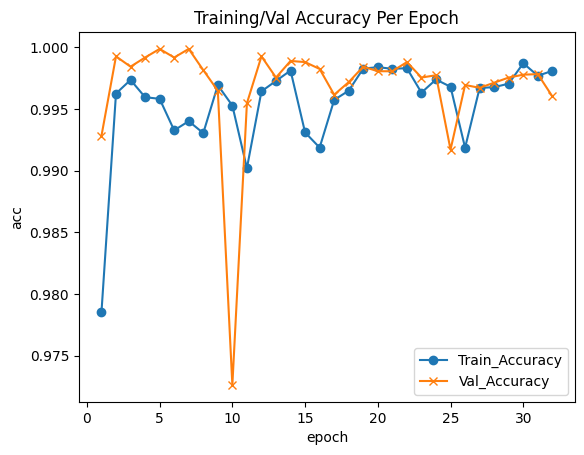

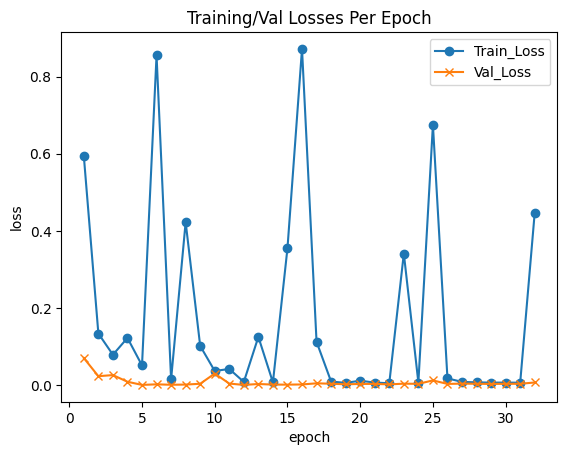

In [ ]:
plotgraphs(dnn1)

674/674 [==============================] - 1s 2ms/step
Accuracy 0.9987938952544417
Precision: 0.9990388852808832
Recall: 0.9987938952544417
F1-score: 0.9988617007695849
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       102
           1       1.00      1.00      1.00     21455

    accuracy                           1.00     21557
   macro avg       0.90      1.00      0.94     21557
weighted avg       1.00      1.00      1.00     21557



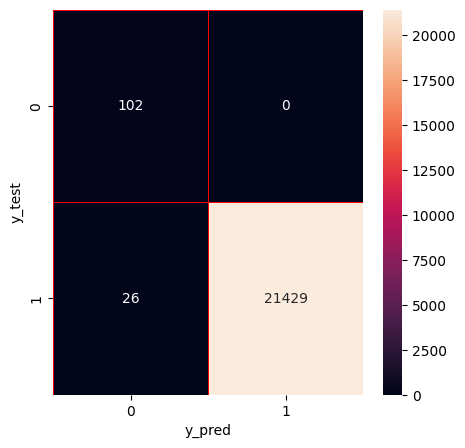

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score
#cnn_model.load_weights("results/cnn2results/checkpoint-879.hdf5")
y_preds = dnn1.predict(features_test)
y_preds = tf.math.round(y_preds)
precision,recall,fscore,none= precision_recall_fscore_support(labels_test,y_preds,average='weighted')
accuracy = accuracy_score(labels_test, y_preds)
print('Accuracy',accuracy)
print('Precision: '+(str(precision)))
print('Recall: '+(str(recall)))
print('F1-score: '+(str(fscore)))
print(classification_report(labels_test,y_preds))
cm=confusion_matrix(labels_test,y_preds)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()

In [ ]:
#create dnn model
dnn2= Sequential()

#layer 1
dnn2.add(Dense(256, activation='relu', input_shape=(features_train.shape[1],)))
dnn2.add(Dropout(0.1))

#layer 2
dnn2.add(Dense(128, activation='relu'))
dnn2.add(Dropout(0.1))

#output layer
dnn2.add(Dense(34, activation = 'sigmoid'))

dnn2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 256)               1792      
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 32)               

In [ ]:
dnn2.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics = ['accuracy'])
dnn2.fit(xtrain,ytrain,epochs=100,batch_size=64, validation_data=(features_test,labels_test),callbacks=[tensorboard_callback, eary_stop_callback])

Epoch 1/100
1744/1744 [==============================] - 15s 7ms/step - loss: 0.3803 - accuracy: 0.9842 - val_loss: 0.0435 - val_accuracy: 0.9992
Epoch 2/100
1744/1744 [==============================] - 13s 8ms/step - loss: 0.1056 - accuracy: 0.9982 - val_loss: 0.0121 - val_accuracy: 0.9988
Epoch 3/100
1744/1744 [==============================] - 12s 7ms/step - loss: 0.0684 - accuracy: 0.9960 - val_loss: 5.5693e-04 - val_accuracy: 0.9999
Epoch 4/100
1744/1744 [==============================] - 12s 7ms/step - loss: 0.1451 - accuracy: 0.9966 - val_loss: 0.0011 - val_accuracy: 0.9995
Epoch 5/100
1744/1744 [==============================] - 10s 6ms/step - loss: 0.1688 - accuracy: 0.9955 - val_loss: 0.0126 - val_accuracy: 0.9999
Epoch 6/100
1744/1744 [==============================] - 12s 7ms/step - loss: 0.0136 - accuracy: 0.9964 - val_loss: 8.3433e-04 - val_accuracy: 0.9992
Epoch 7/100
1744/1744 [==============================] - 12s 7ms/step - loss: 0.0194 - accuracy: 0.9966 - val_loss: 

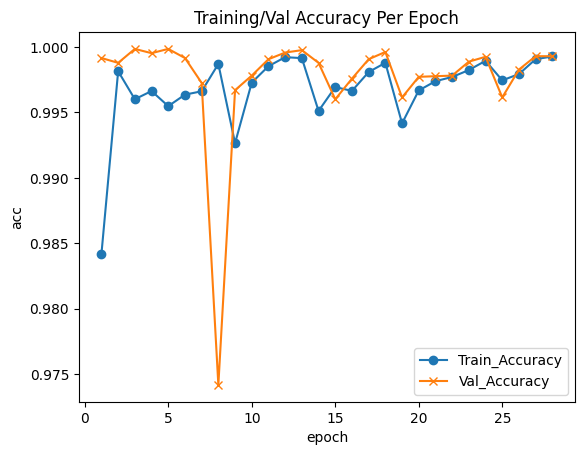

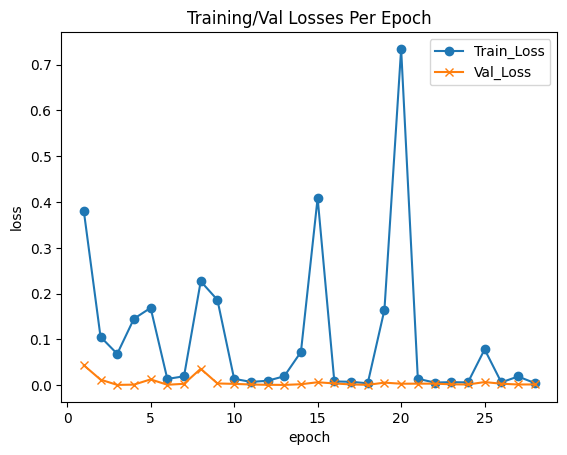

In [ ]:
plotgraphs(dnn2)

674/674 [==============================] - 1s 2ms/step
Accuracy 0.9996288908475205
Precision: 0.9996558806040645
Recall: 0.9996288908475205
F1-score: 0.9996358583063624
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       102
           1       1.00      1.00      1.00     21455

    accuracy                           1.00     21557
   macro avg       0.96      1.00      0.98     21557
weighted avg       1.00      1.00      1.00     21557



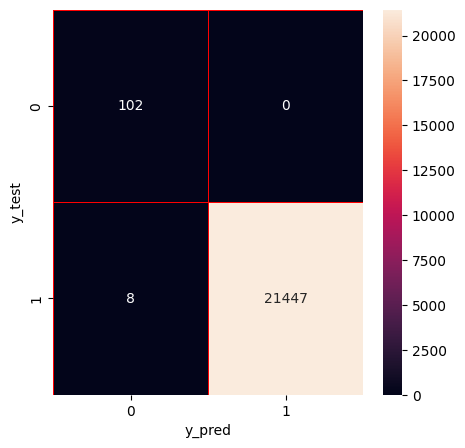

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score
#cnn_model.load_weights("results/cnn2results/checkpoint-879.hdf5")
y_preds = dnn2.predict(features_test)
y_preds = tf.math.round(y_preds)
precision,recall,fscore,none= precision_recall_fscore_support(labels_test,y_preds,average='weighted')
accuracy = accuracy_score(labels_test, y_preds)
print('Accuracy',accuracy)
print('Precision: '+(str(precision)))
print('Recall: '+(str(recall)))
print('F1-score: '+(str(fscore)))
print(classification_report(labels_test,y_preds))
cm=confusion_matrix(labels_test,y_preds)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()

In [ ]:
#create dnn model
dnn3= Sequential()

#layer 1
dnn3.add(Dense(256, activation='relu', input_shape=(features_train.shape[1],)))
dnn3.add(Dropout(0.1))

#layer 2
dnn3.add(Dense(128, activation='relu'))
dnn3.add(Dropout(0.1))

#layer 3
dnn3.add(Dense(64, activation='relu'))
dnn3.add(Dropout(0.1))

#output layer
dnn3.add(Dense(34, activation = 'sigmoid'))

dnn3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 256)               1792      
                                                                 
 dropout_11 (Dropout)        (None, 256)               0         
                                                                 
 dense_16 (Dense)            (None, 128)               32896     
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dropout_13 (Dropout)        (None, 64)                0         
                                                                 
 dense_18 (Dense)            (None, 32)               

In [ ]:
dnn3.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics = ['accuracy'])
dnn3.fit(xtrain,ytrain,epochs=100,batch_size=64, validation_data=(features_test,labels_test),callbacks=[tensorboard_callback, eary_stop_callback])

Epoch 1/100
1744/1744 [==============================] - 15s 8ms/step - loss: 0.4208 - accuracy: 0.9877 - val_loss: 0.0212 - val_accuracy: 0.9988
Epoch 2/100
1744/1744 [==============================] - 13s 7ms/step - loss: 0.2141 - accuracy: 0.9972 - val_loss: 0.0955 - val_accuracy: 0.9970
Epoch 3/100
1744/1744 [==============================] - 13s 7ms/step - loss: 0.4977 - accuracy: 0.9978 - val_loss: 0.0826 - val_accuracy: 0.9983
Epoch 4/100
1744/1744 [==============================] - 12s 7ms/step - loss: 0.3948 - accuracy: 0.9975 - val_loss: 0.0211 - val_accuracy: 0.9993
Epoch 5/100
1744/1744 [==============================] - 11s 6ms/step - loss: 0.2475 - accuracy: 0.9974 - val_loss: 0.0062 - val_accuracy: 0.9991
Epoch 6/100
1744/1744 [==============================] - 12s 7ms/step - loss: 0.0102 - accuracy: 0.9971 - val_loss: 3.8671e-04 - val_accuracy: 0.9998
Epoch 7/100
1744/1744 [==============================] - 12s 7ms/step - loss: 0.0640 - accuracy: 0.9959 - val_loss: 0.01

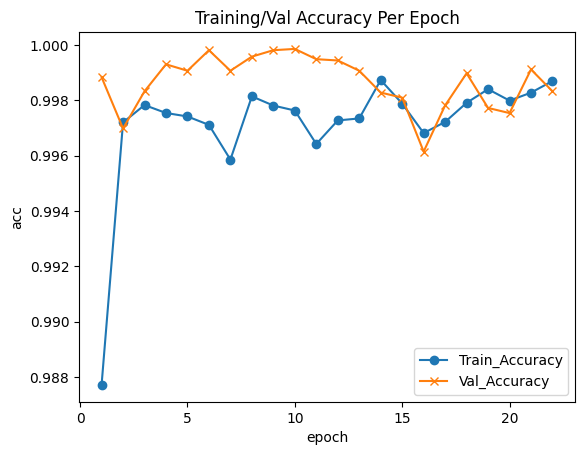

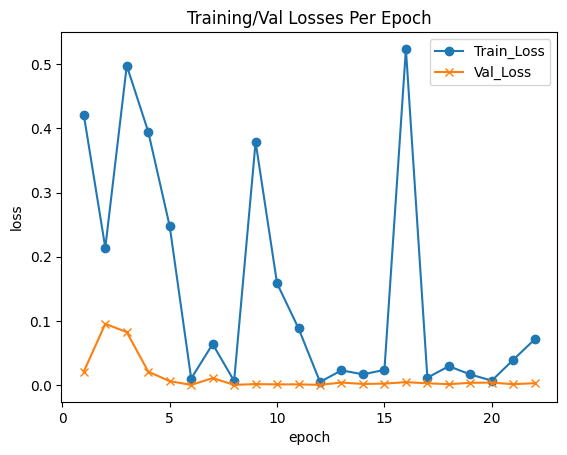

In [ ]:
plotgraphs(dnn3)

674/674 [==============================] - 1s 2ms/step
Accuracy 0.9994433362712808
Precision: 0.9995019324532513
Recall: 0.9994433362712808
F1-score: 0.9994587212939374
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       102
           1       1.00      1.00      1.00     21455

    accuracy                           1.00     21557
   macro avg       0.95      1.00      0.97     21557
weighted avg       1.00      1.00      1.00     21557



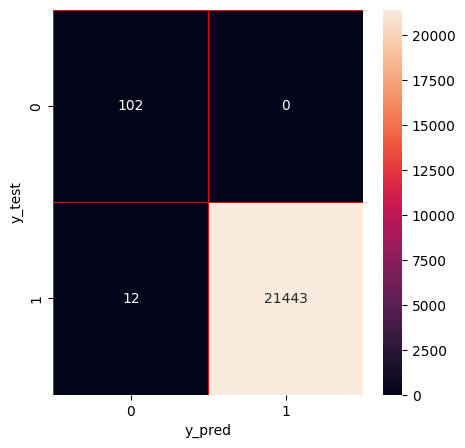

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score
#cnn_model.load_weights("results/cnn2results/checkpoint-879.hdf5")
y_preds = dnn3.predict(features_test)
y_preds = tf.math.round(y_preds)
precision,recall,fscore,none= precision_recall_fscore_support(labels_test,y_preds,average='weighted')
accuracy = accuracy_score(labels_test, y_preds)
print('Accuracy',accuracy)
print('Precision: '+(str(precision)))
print('Recall: '+(str(recall)))
print('F1-score: '+(str(fscore)))
print(classification_report(labels_test,y_preds))
cm=confusion_matrix(labels_test,y_preds)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()

### CNN Models

In [ ]:
# # reshape input to be [samples, time steps, features]
# y_train= to_categorical(labels_train)
# y_test= to_categorical(labels_test)
# y_val= to_categorical(labels_val)

# X_train = np.array(features_train).reshape(features_train.shape[0], features_train.shape[1], 1)
# X_test = np.array(features_test).reshape(features_test.shape[0], features_test.shape[1], 1)
# X_val = np.array(features_val).reshape(features_val.shape[0], features_val.shape[1], 1)
# X_train.shape , X_test.shape , X_val.shape
#

# reshape input to be [samples, time steps, features]
y_train= to_categorical(labels_train)
y_test= to_categorical(labels_test)
# y_val= to_categorical(labels_val)

X_train = np.array(features_train).reshape(features_train.shape[0], features_train.shape[1], 1)
X_test = np.array(features_test).reshape(features_test.shape[0], features_test.shape[1], 1)
# X_val = np.array(features_val).reshape(features_val.shape[0], features_val.shape[1], 1)
# X_train.shape , X_test.shape , X_val.shape
X_train.shape , X_test.shape

((86226, 6, 1), (21557, 6, 1))

In [ ]:
#hyperparameters
keras.backend.clear_session()
SEED = 1040941203
hidden_initializer = random_uniform(seed=SEED)

#create model
cnn3 = Sequential()
cnn3.add(Conv1D(64, 3, input_shape=(6, 1)))
cnn3.add(LeakyReLU(alpha=0.1))
cnn3.add(MaxPooling1D(pool_size=2))
cnn3.add(Dropout(0.3))

cnn3.add(Conv1D(64, 1))
cnn3.add(LeakyReLU(alpha=0.1))
cnn3.add(Dropout(0.3))

cnn3.add(Conv1D(64, 1))
cnn3.add(LeakyReLU(alpha=0.1))
cnn3.add(Dropout(0.3))

cnn3.add(Flatten())
cnn3.add(Dense(64, input_dim=15, kernel_initializer=hidden_initializer))
cnn3.add(LeakyReLU(alpha=0.1))
cnn3.add(Dense(32))
cnn3.add(LeakyReLU(alpha=0.1))
cnn3.add(Dense(1, activation='sigmoid'))

cnn3.summary()

In [ ]:
cnn3.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics = ['accuracy'])
cnn3.fit(xtrain,ytrain,epochs=100,batch_size=64, validation_data=(features_test,labels_test),callbacks=[tensorboard_callback, eary_stop_callback])

Epoch 1/100
1744/1744 [==============================] - 14s 7ms/step - loss: 0.1354 - accuracy: 0.9798 - val_loss: 0.0279 - val_accuracy: 0.9905
Epoch 2/100
1744/1744 [==============================] - 12s 7ms/step - loss: 0.0253 - accuracy: 0.9941 - val_loss: 0.0118 - val_accuracy: 0.9979
Epoch 3/100
1744/1744 [==============================] - 12s 7ms/step - loss: 0.0089 - accuracy: 0.9986 - val_loss: 3.6350e-04 - val_accuracy: 1.0000
Epoch 4/100
1744/1744 [==============================] - 12s 7ms/step - loss: 0.0108 - accuracy: 0.9988 - val_loss: 0.0101 - val_accuracy: 0.9982
Epoch 5/100
1744/1744 [==============================] - 13s 7ms/step - loss: 0.0379 - accuracy: 0.9981 - val_loss: 0.0177 - val_accuracy: 0.9987
Epoch 6/100
1744/1744 [==============================] - 13s 7ms/step - loss: 0.2680 - accuracy: 0.9976 - val_loss: 0.0221 - val_accuracy: 0.9981
Epoch 7/100
1744/1744 [==============================] - 11s 6ms/step - loss: 0.0468 - accuracy: 0.9978 - val_loss: 0.01

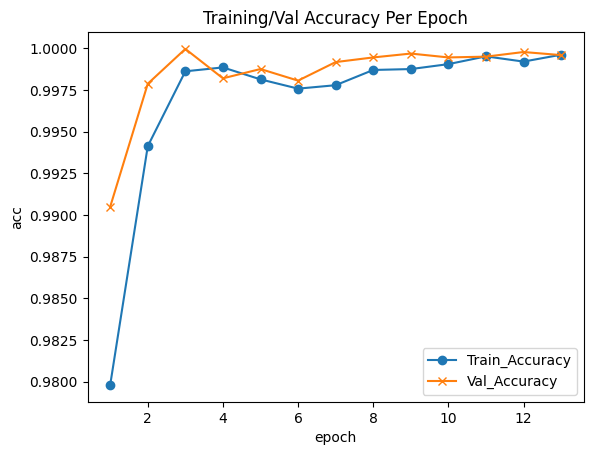

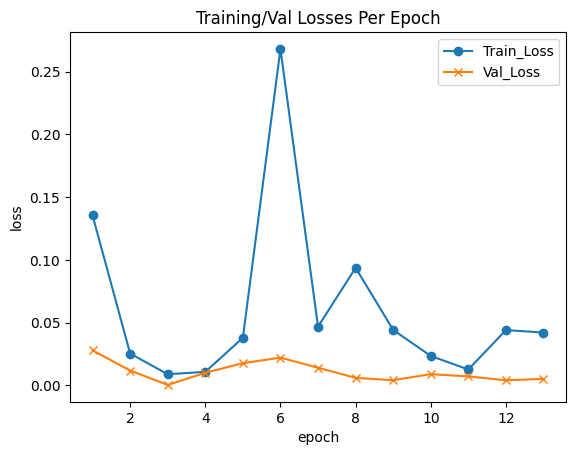

In [ ]:
plotgraphs(cnn3)

674/674 [==============================] - 1s 2ms/step
Accuracy 0.9999536113559401
Precision: 0.9999540617311251
Recall: 0.9999536113559401
F1-score: 0.9999537239584275
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       102
           1       1.00      1.00      1.00     21455

    accuracy                           1.00     21557
   macro avg       1.00      1.00      1.00     21557
weighted avg       1.00      1.00      1.00     21557



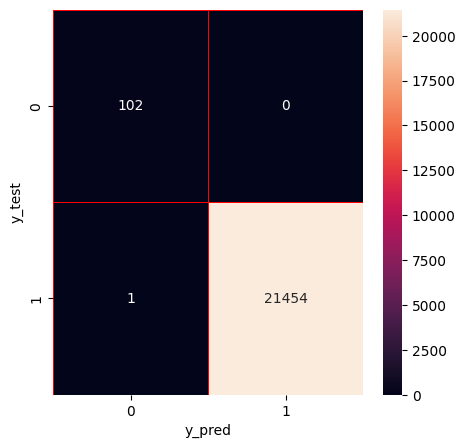

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score
y_preds = cnn3.predict(features_test)
y_preds = tf.math.round(y_preds)
precision,recall,fscore,none= precision_recall_fscore_support(labels_test,y_preds,average='weighted')
accuracy = accuracy_score(labels_test, y_preds)
print('Accuracy',accuracy)
print('Precision: '+(str(precision)))
print('Recall: '+(str(recall)))
print('F1-score: '+(str(fscore)))
print(classification_report(labels_test,y_preds))
cm=confusion_matrix(labels_test,y_preds)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()

In [ ]:
#hyperparameters
keras.backend.clear_session()
SEED = 1040941203
hidden_initializer = random_uniform(seed=SEED)


# create model
cnn2 = Sequential()
cnn2.add(Conv1D(64, 3, input_shape=(6, 1)))
cnn2.add(LeakyReLU(alpha=0.1))
cnn2.add(MaxPooling1D(pool_size=2))
cnn2.add(Dropout(0.3))

cnn2.add(Conv1D(64, 1))
cnn2.add(LeakyReLU(alpha=0.1))
cnn2.add(Dropout(0.3))

cnn2.add(Flatten())
cnn2.add(Dense(64, input_dim=15, kernel_initializer=hidden_initializer))
cnn2.add(LeakyReLU(alpha=0.1))
cnn2.add(Dense(32))
cnn2.add(LeakyReLU(alpha=0.1))
cnn2.add(Dense(1, activation='sigmoid'))

cnn2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 64)             256       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 4, 64)             0         
                                                                 
 max_pooling1d (MaxPooling1  (None, 2, 64)             0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 2, 64)             0         
                                                                 
 conv1d_1 (Conv1D)           (None, 2, 64)             4160      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 2, 64)             0         
                                                        

In [ ]:
cnn2.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics = ['accuracy'])
cnn2.fit(xtrain,ytrain,epochs=100,batch_size=64, validation_data=(features_test,labels_test),callbacks=[tensorboard_callback, eary_stop_callback])

Epoch 1/100
1744/1744 [==============================] - 12s 6ms/step - loss: 0.2034 - accuracy: 0.9760 - val_loss: 0.0642 - val_accuracy: 0.9697
Epoch 2/100
1744/1744 [==============================] - 10s 6ms/step - loss: 0.0439 - accuracy: 0.9912 - val_loss: 0.0146 - val_accuracy: 0.9977
Epoch 3/100
1744/1744 [==============================] - 9s 5ms/step - loss: 0.0191 - accuracy: 0.9982 - val_loss: 0.0263 - val_accuracy: 0.9974
Epoch 4/100
1744/1744 [==============================] - 10s 6ms/step - loss: 0.0729 - accuracy: 0.9971 - val_loss: 0.0142 - val_accuracy: 0.9992
Epoch 5/100
1744/1744 [==============================] - 10s 6ms/step - loss: 0.1080 - accuracy: 0.9979 - val_loss: 0.0097 - val_accuracy: 0.9993
Epoch 6/100
1744/1744 [==============================] - 10s 6ms/step - loss: 0.0703 - accuracy: 0.9986 - val_loss: 0.0185 - val_accuracy: 0.9992
Epoch 7/100
1744/1744 [==============================] - 10s 6ms/step - loss: 0.0300 - accuracy: 0.9992 - val_loss: 0.0421 - 

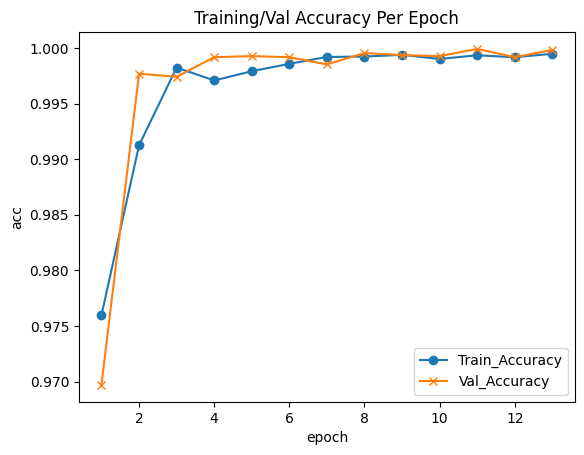

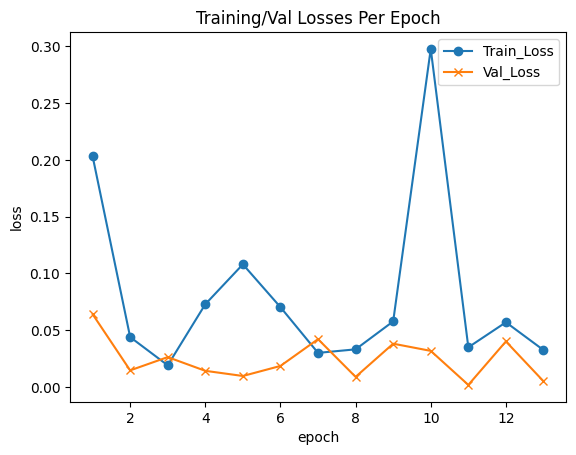

In [ ]:
plotgraphs(cnn2)

674/674 [==============================] - 1s 2ms/step
Accuracy 0.9974022359326437
Precision: 0.9983229624375295
Recall: 0.9974022359326437
F1-score: 0.9976802978095692
              precision    recall  f1-score   support

           0       0.65      1.00      0.78       102
           1       1.00      1.00      1.00     21455

    accuracy                           1.00     21557
   macro avg       0.82      1.00      0.89     21557
weighted avg       1.00      1.00      1.00     21557



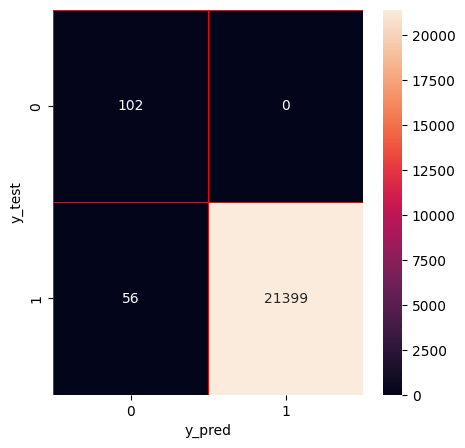

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score
y_preds = cnn2.predict(features_test)
y_preds = tf.math.round(y_preds)
precision,recall,fscore,none= precision_recall_fscore_support(labels_test,y_preds,average='weighted')
accuracy = accuracy_score(labels_test, y_preds)
print('Accuracy',accuracy)
print('Precision: '+(str(precision)))
print('Recall: '+(str(recall)))
print('F1-score: '+(str(fscore)))
print(classification_report(labels_test,y_preds))
cm=confusion_matrix(labels_test,y_preds)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()

In [ ]:
#hyperparameters
keras.backend.clear_session()
SEED = 1040941203
hidden_initializer = random_uniform(seed=SEED)


# create model
cnn1 = Sequential()
cnn1.add(Conv1D(64, 3, input_shape=(6, 1)))
cnn1.add(LeakyReLU(alpha=0.1))
cnn1.add(MaxPooling1D(pool_size=2))
cnn1.add(Dropout(0.3))

cnn1.add(Flatten())
cnn1.add(Dense(64, input_dim=15, kernel_initializer=hidden_initializer))
cnn1.add(LeakyReLU(alpha=0.1))
cnn1.add(Dense(32))
cnn1.add(LeakyReLU(alpha=0.1))
cnn1.add(Dense(1, activation='sigmoid'))

cnn1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 64)             256       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 4, 64)             0         
                                                                 
 max_pooling1d (MaxPooling1  (None, 2, 64)             0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 2, 64)             0         
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                        

In [ ]:
cnn1.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics = ['accuracy'])
cnn1.fit(xtrain,ytrain,epochs=100,batch_size=64, validation_data=(features_test,labels_test),callbacks=[tensorboard_callback, eary_stop_callback])

Epoch 1/100
1744/1744 [==============================] - 10s 5ms/step - loss: 0.2519 - accuracy: 0.9891 - val_loss: 0.0670 - val_accuracy: 0.9983
Epoch 2/100
1744/1744 [==============================] - 7s 4ms/step - loss: 0.0986 - accuracy: 0.9989 - val_loss: 0.0544 - val_accuracy: 0.9993
Epoch 3/100
1744/1744 [==============================] - 9s 5ms/step - loss: 0.0479 - accuracy: 0.9996 - val_loss: 0.0071 - val_accuracy: 0.9999
Epoch 4/100
1744/1744 [==============================] - 8s 5ms/step - loss: 0.0488 - accuracy: 0.9997 - val_loss: 0.0053 - val_accuracy: 0.9999
Epoch 5/100
1744/1744 [==============================] - 8s 5ms/step - loss: 0.0302 - accuracy: 0.9997 - val_loss: 0.0075 - val_accuracy: 0.9999
Epoch 6/100
1744/1744 [==============================] - 9s 5ms/step - loss: 0.0420 - accuracy: 0.9998 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 7/100
1744/1744 [==============================] - 7s 4ms/step - loss: 0.0445 - accuracy: 0.9998 - val_loss: 0.0022 - val_a

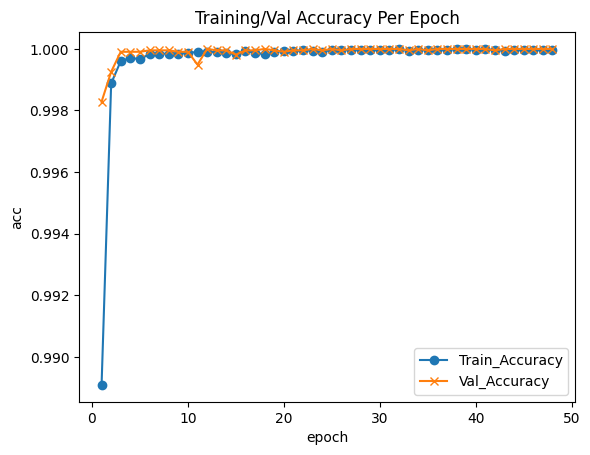

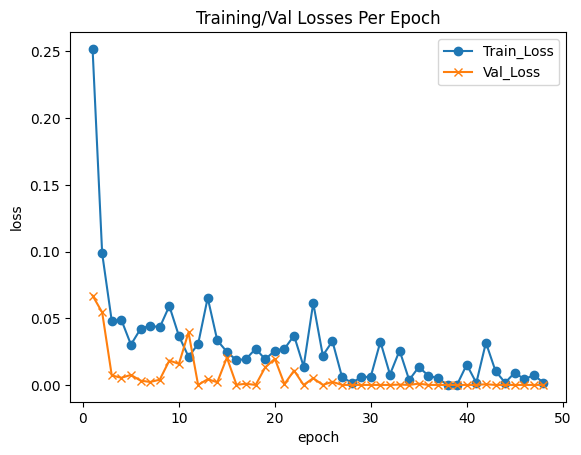

In [ ]:
plotgraphs(cnn1)

674/674 [==============================] - 1s 2ms/step
Accuracy 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00     21455

    accuracy                           1.00     21557
   macro avg       1.00      1.00      1.00     21557
weighted avg       1.00      1.00      1.00     21557



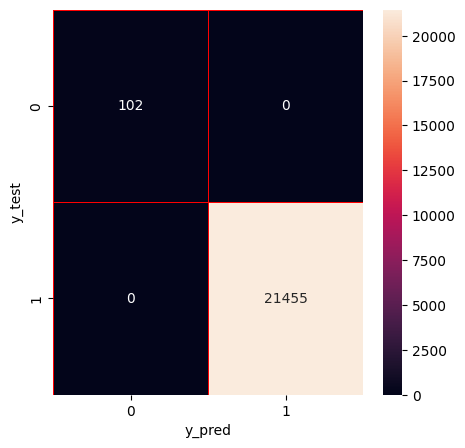

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score
#cnn_model.load_weights("results/cnn2results/checkpoint-879.hdf5")
y_preds = cnn1.predict(features_test)
y_preds = tf.math.round(y_preds)
precision,recall,fscore,none= precision_recall_fscore_support(labels_test,y_preds,average='weighted')
accuracy = accuracy_score(labels_test, y_preds)
print('Accuracy',accuracy)
print('Precision: '+(str(precision)))
print('Recall: '+(str(recall)))
print('F1-score: '+(str(fscore)))
print(classification_report(labels_test,y_preds))
cm=confusion_matrix(labels_test,y_preds)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()

### RNN Models

In [ ]:
# reshape input to be [samples, time steps, features] for RNN
RNN_features_train = np.reshape(features_train, (features_train.shape[0],features_train.shape[1],1))
RNN_features_test = np.reshape(features_test, (features_test.shape[0],features_test.shape[1],1))
# RNN_features_val = np.reshape(features_val, (features_val.shape[0],features_val.shape[1],1))

In [ ]:
#hyperparameters
keras.backend.clear_session()
SEED = 1040941203
hidden_initializer = random_uniform(seed=SEED)
# Initialising the RNN
rnn1 = Sequential()

# Adding the first RNN layer and some Dropout regularisation
rnn1.add(SimpleRNN(units = 32,activation='relu', return_sequences = True,  input_shape = (6,1)))
rnn1.add(Dropout(0.1))

# Adding the output layer
rnn1.add(Flatten())
rnn1.add(Dense(32, input_dim=25, kernel_initializer=hidden_initializer))
rnn1.add(LeakyReLU(alpha=0.1))
rnn1.add(Dense(16))
rnn1.add(LeakyReLU(alpha=0.1))
rnn1.add(Dense(units = 1, activation='sigmoid'))

rnn1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 6, 32)             1088      
                                                                 
 dropout (Dropout)           (None, 6, 32)             0         
                                                                 
 flatten (Flatten)           (None, 192)               0         
                                                                 
 dense (Dense)               (None, 32)                6176      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16)                0

In [ ]:
rnn1.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics = ['accuracy'])
rnn1.fit(xtrain,ytrain,epochs=100,batch_size=64, validation_data=(features_test,labels_test),callbacks=[tensorboard_callback, eary_stop_callback])

Epoch 1/100
1744/1744 [==============================] - 12s 6ms/step - loss: 0.1276 - accuracy: 0.9875 - val_loss: 0.0182 - val_accuracy: 0.9992
Epoch 2/100
1744/1744 [==============================] - 11s 6ms/step - loss: 0.0410 - accuracy: 0.9992 - val_loss: 4.2679e-07 - val_accuracy: 1.0000
Epoch 3/100
1744/1744 [==============================] - 11s 6ms/step - loss: 0.0491 - accuracy: 0.9994 - val_loss: 0.0087 - val_accuracy: 0.9999
Epoch 4/100
1744/1744 [==============================] - 11s 7ms/step - loss: 0.0593 - accuracy: 0.9996 - val_loss: 0.0415 - val_accuracy: 0.9998
Epoch 5/100
1744/1744 [==============================] - 9s 5ms/step - loss: 0.0406 - accuracy: 0.9999 - val_loss: 0.0361 - val_accuracy: 0.9995
Epoch 6/100
1744/1744 [==============================] - 10s 5ms/step - loss: 0.0221 - accuracy: 0.9999 - val_loss: 7.8728e-17 - val_accuracy: 1.0000
Epoch 7/100
1744/1744 [==============================] - 10s 6ms/step - loss: 0.0238 - accuracy: 0.9999 - val_loss: 0

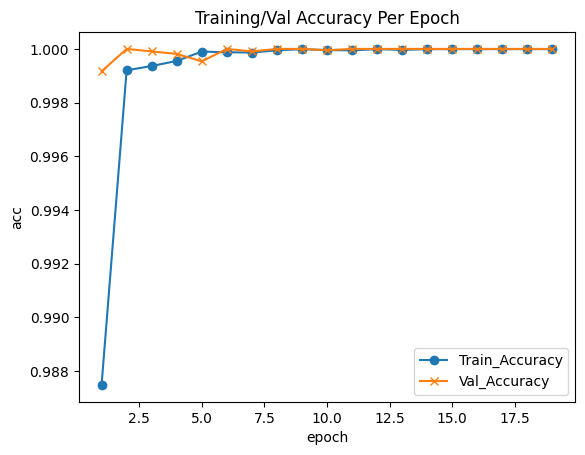

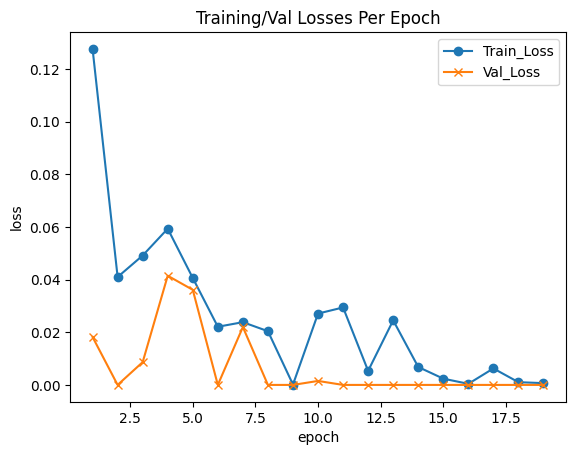

In [ ]:
plotgraphs(rnn1)

674/674 [==============================] - 2s 2ms/step
Accuracy 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00     21455

    accuracy                           1.00     21557
   macro avg       1.00      1.00      1.00     21557
weighted avg       1.00      1.00      1.00     21557



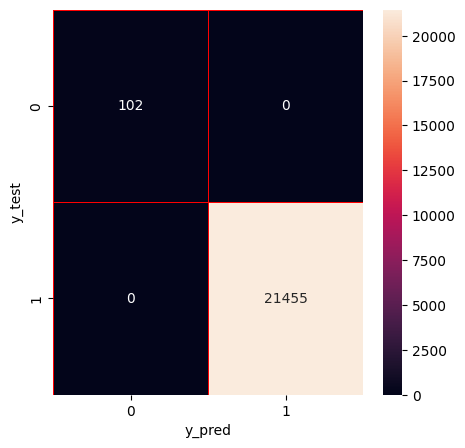

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score
#cnn_model.load_weights("results/cnn2results/checkpoint-879.hdf5")
y_preds = rnn1.predict(features_test)
y_preds = tf.math.round(y_preds)
precision,recall,fscore,none= precision_recall_fscore_support(labels_test,y_preds,average='weighted')
accuracy = accuracy_score(labels_test, y_preds)
print('Accuracy',accuracy)
print('Precision: '+(str(precision)))
print('Recall: '+(str(recall)))
print('F1-score: '+(str(fscore)))
print(classification_report(labels_test,y_preds))
cm=confusion_matrix(labels_test,y_preds)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()

In [ ]:
#hyperparameters
keras.backend.clear_session()
SEED = 1040941203
hidden_initializer = random_uniform(seed=SEED)
# Initialising the RNN
rnn2 = Sequential()

# Adding the first RNN layer and some Dropout regularisation
rnn2.add(SimpleRNN(units = 32,activation='relu', return_sequences = True,  input_shape = (6,1)))
rnn2.add(Dropout(0.1))

# Adding a second RNN layer and some Dropout regularisation
rnn2.add(SimpleRNN(units = 32,activation='relu', return_sequences = True))
rnn2.add(Dropout(0.1))

# Adding the output layer
rnn2.add(Flatten())
rnn2.add(Dense(32, input_dim=25, kernel_initializer=hidden_initializer))
rnn2.add(LeakyReLU(alpha=0.1))
rnn2.add(Dense(16))
rnn2.add(LeakyReLU(alpha=0.1))
rnn2.add(Dense(units = 1, activation='sigmoid'))

rnn2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 6, 32)             1088      
                                                                 
 dropout (Dropout)           (None, 6, 32)             0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 6, 32)             2080      
                                                                 
 dropout_1 (Dropout)         (None, 6, 32)             0         
                                                                 
 flatten (Flatten)           (None, 192)               0         
                                                                 
 dense (Dense)               (None, 32)                6176      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32)                0

In [ ]:
rnn2.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics = ['accuracy'])
rnn2.fit(xtrain,ytrain,epochs=100,batch_size=64, validation_data=(features_test,labels_test),callbacks=[tensorboard_callback, eary_stop_callback])

Epoch 1/100
1744/1744 [==============================] - 19s 9ms/step - loss: 0.1859 - accuracy: 0.9888 - val_loss: 0.0345 - val_accuracy: 0.9989
Epoch 2/100
1744/1744 [==============================] - 15s 9ms/step - loss: 0.0340 - accuracy: 0.9995 - val_loss: 0.0159 - val_accuracy: 0.9998
Epoch 3/100
1744/1744 [==============================] - 15s 9ms/step - loss: 0.0146 - accuracy: 0.9999 - val_loss: 4.7513e-04 - val_accuracy: 1.0000
Epoch 4/100
1744/1744 [==============================] - 20s 12ms/step - loss: 0.0121 - accuracy: 0.9999 - val_loss: 9.0266e-04 - val_accuracy: 1.0000
Epoch 5/100
1744/1744 [==============================] - 14s 8ms/step - loss: 0.0094 - accuracy: 0.9999 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 6/100
1744/1744 [==============================] - 21s 12ms/step - loss: 0.1303 - accuracy: 0.9999 - val_loss: 0.0281 - val_accuracy: 0.9999
Epoch 7/100
1744/1744 [==============================] - 17s 10ms/step - loss: 0.0298 - accuracy: 0.9999 - val_los

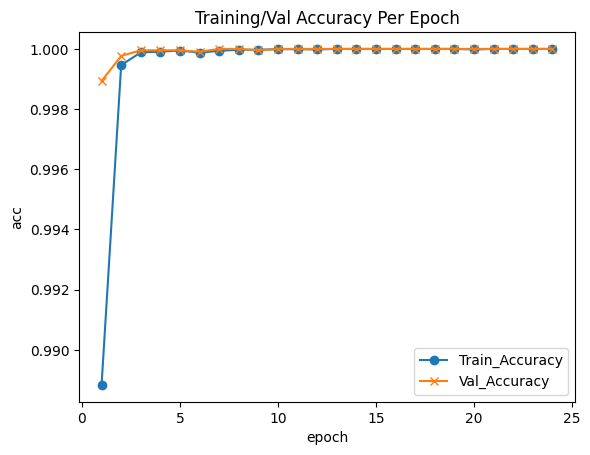

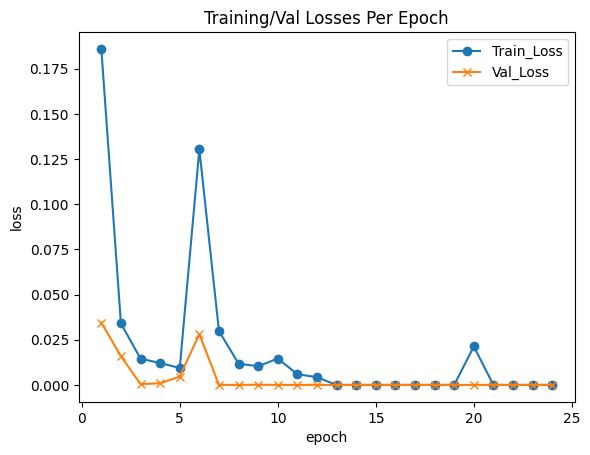

In [ ]:
plotgraphs(rnn2)

674/674 [==============================] - 2s 3ms/step
Accuracy 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00     21455

    accuracy                           1.00     21557
   macro avg       1.00      1.00      1.00     21557
weighted avg       1.00      1.00      1.00     21557



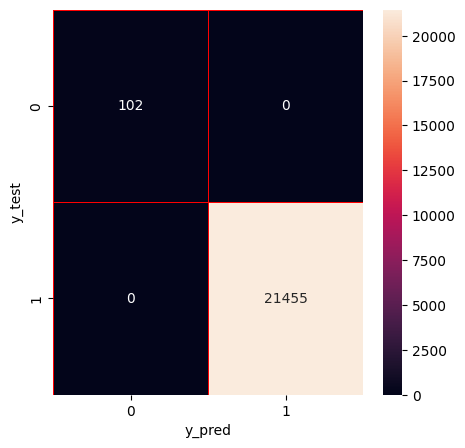

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score
#cnn_model.load_weights("results/cnn2results/checkpoint-879.hdf5")
y_preds = rnn2.predict(features_test)
y_preds = tf.math.round(y_preds)
precision,recall,fscore,none= precision_recall_fscore_support(labels_test,y_preds,average='weighted')
accuracy = accuracy_score(labels_test, y_preds)
print('Accuracy',accuracy)
print('Precision: '+(str(precision)))
print('Recall: '+(str(recall)))
print('F1-score: '+(str(fscore)))
print(classification_report(labels_test,y_preds))
cm=confusion_matrix(labels_test,y_preds)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()

In [ ]:
#hyperparameters
keras.backend.clear_session()
SEED = 1040941203
hidden_initializer = random_uniform(seed=SEED)
# Initialising the RNN
rnn3 = Sequential()

# Adding the first RNN layer and some Dropout regularisation
rnn3.add(SimpleRNN(units = 32,activation='relu', return_sequences = True,  input_shape = (6,1)))
rnn3.add(Dropout(0.1))

# Adding a second RNN layer and some Dropout regularisation
rnn3.add(SimpleRNN(units = 32,activation='relu', return_sequences = True))
rnn3.add(Dropout(0.1))

# Adding a third RNN layer and some Dropout regularisation
rnn3.add(SimpleRNN(units = 32,activation='relu', return_sequences = True))
rnn3.add(Dropout(0.1))

# Adding the output layer
rnn3.add(Flatten())
rnn3.add(Dense(32, input_dim=25, kernel_initializer=hidden_initializer))
rnn3.add(LeakyReLU(alpha=0.1))
rnn3.add(Dense(16))
rnn3.add(LeakyReLU(alpha=0.1))
rnn3.add(Dense(units = 1, activation='sigmoid'))

rnn3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 6, 32)             1088      
                                                                 
 dropout (Dropout)           (None, 6, 32)             0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 6, 32)             2080      
                                                                 
 dropout_1 (Dropout)         (None, 6, 32)             0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 6, 32)             2080      
                                                                 
 dropout_2 (Dropout)         (None, 6, 32)             0         
                                                                 
 flatten (Flatten)           (None, 192)               0

In [ ]:
rnn3.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics = ['accuracy'])
rnn3.fit(xtrain,ytrain,epochs=100,batch_size=64, validation_data=(features_test,labels_test),callbacks=[tensorboard_callback, eary_stop_callback])

Epoch 1/100
1744/1744 [==============================] - 31s 16ms/step - loss: 0.2504 - accuracy: 0.9890 - val_loss: 0.0127 - val_accuracy: 0.9998
Epoch 2/100
1744/1744 [==============================] - 27s 16ms/step - loss: 0.4843 - accuracy: 0.9993 - val_loss: 0.1243 - val_accuracy: 0.9993
Epoch 3/100
1744/1744 [==============================] - 19s 11ms/step - loss: 0.2457 - accuracy: 0.9996 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 4/100
1744/1744 [==============================] - 22s 12ms/step - loss: 0.0909 - accuracy: 0.9998 - val_loss: 0.0084 - val_accuracy: 1.0000
Epoch 5/100
1744/1744 [==============================] - 19s 11ms/step - loss: 0.0812 - accuracy: 0.9999 - val_loss: 0.0173 - val_accuracy: 1.0000
Epoch 6/100
1744/1744 [==============================] - 20s 11ms/step - loss: 0.0277 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/100
1744/1744 [==============================] - 20s 11ms/step - loss: 0.0116 - accuracy: 1.0000 - val_los

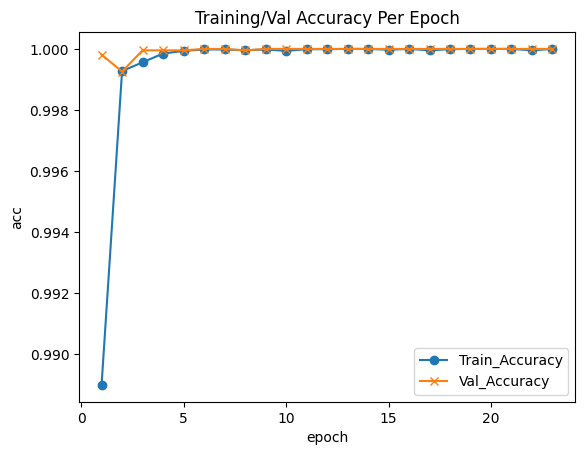

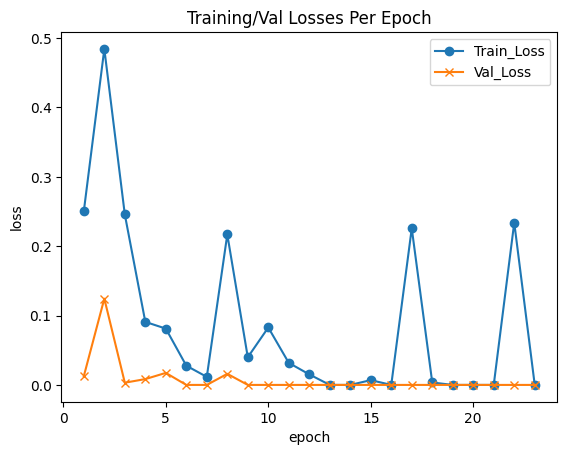

In [ ]:
plotgraphs(rnn3)

674/674 [==============================] - 3s 4ms/step
Accuracy 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00     21455

    accuracy                           1.00     21557
   macro avg       1.00      1.00      1.00     21557
weighted avg       1.00      1.00      1.00     21557



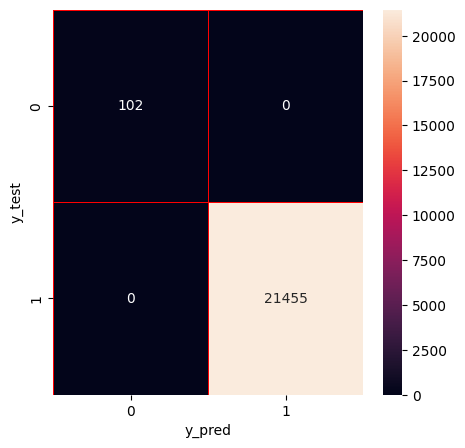

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score
#cnn_model.load_weights("results/cnn2results/checkpoint-879.hdf5")
y_preds = rnn3.predict(features_test)
y_preds = tf.math.round(y_preds)
precision,recall,fscore,none= precision_recall_fscore_support(labels_test,y_preds,average='weighted')
accuracy = accuracy_score(labels_test, y_preds)
print('Accuracy',accuracy)
print('Precision: '+(str(precision)))
print('Recall: '+(str(recall)))
print('F1-score: '+(str(fscore)))
print(classification_report(labels_test,y_preds))
cm=confusion_matrix(labels_test,y_preds)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()